<a href="https://colab.research.google.com/github/ehsankarami1358/ehsan/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from numpy.linalg import svd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [93]:
def Manual_PCA(X,k=2):
  m=X.shape[0]
  X_norm=X-X.mean(axis=0) #step1:zero-center data(remove mean)
  Sigma=(X_norm.T@X_norm)/m # step 2:compute covariance matrix
  U,S,VT=svd(Sigma) # step3:singular value Decomposition
  X_proj=X_norm @ U[:, :k] #project data
  V=np.transpose(VT)
  return X_proj,U,S,V


In [94]:
X=np.array([[2,-1,1,0,2],
            [2,2,2,2,1],
            [1,1,1,0,1],
            [5,5,5,2,0],
            [1,1,0,2,2],
            [0,0,0,3,3],
            [0,-1,0,-1,1]],dtype=np.float32)
print(X)

[[ 2. -1.  1.  0.  2.]
 [ 2.  2.  2.  2.  1.]
 [ 1.  1.  1.  0.  1.]
 [ 5.  5.  5.  2.  0.]
 [ 1.  1.  0.  2.  2.]
 [ 0.  0.  0.  3.  3.]
 [ 0. -1.  0. -1.  1.]]


In [95]:
X_proj,_,_,_=Manual_PCA(X,k=2)
print(X_proj)

[[ 1.4970986   1.1862993 ]
 [-1.458537   -0.56314224]
 [ 0.5487078   0.9959462 ]
 [-6.6480775   0.33380988]
 [ 0.95121646 -1.303748  ]
 [ 2.1081123  -2.5341668 ]
 [ 3.001479    1.8850021 ]]


In [96]:
A=np.array([[90,60,90],
            [90,90,30],
            [60,60,60],
            [60,60,90],
            [30,30,30]],dtype=np.float32)
print(A)

[[90. 60. 90.]
 [90. 90. 30.]
 [60. 60. 60.]
 [60. 60. 90.]
 [30. 30. 30.]]


In [97]:
u,s,vt=svd(A.T @ A)
print('U= ',u)
print('S= ',s)

U=  [[-0.61877745 -0.31692725 -0.71879876]
 [-0.5517488  -0.4759884   0.6848418 ]
 [-0.55918485  0.820361    0.11966664]]
S=  [62266.645    3159.1123    274.24503]


In [98]:
np.linalg.eig(A.T @ A)

EigResult(eigenvalues=array([62266.645  ,   274.24503,  3159.1123 ], dtype=float32), eigenvectors=array([[-0.61877745, -0.71879876, -0.31692725],
       [-0.5517488 ,  0.6848418 , -0.4759884 ],
       [-0.55918485,  0.11966664,  0.820361  ]], dtype=float32))

PCA in pakage

In [99]:
plt.rcParams['figure.figsize']=[8,4]
plt.rcParams['figure.dpi']=150
plt.style.use('Solarize_Light2')

In [100]:
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [101]:
df.shape

(167, 10)

In [102]:
df.dtypes.value_counts()
df_new=df.drop(columns='country')
for column in df_new:
  df_new[column]=df_new[column].astype(float)
df_new.dtypes.value_counts()

,count
float64,9


In [103]:
label=df['country']

In [104]:
df_new.isnull().sum()

,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


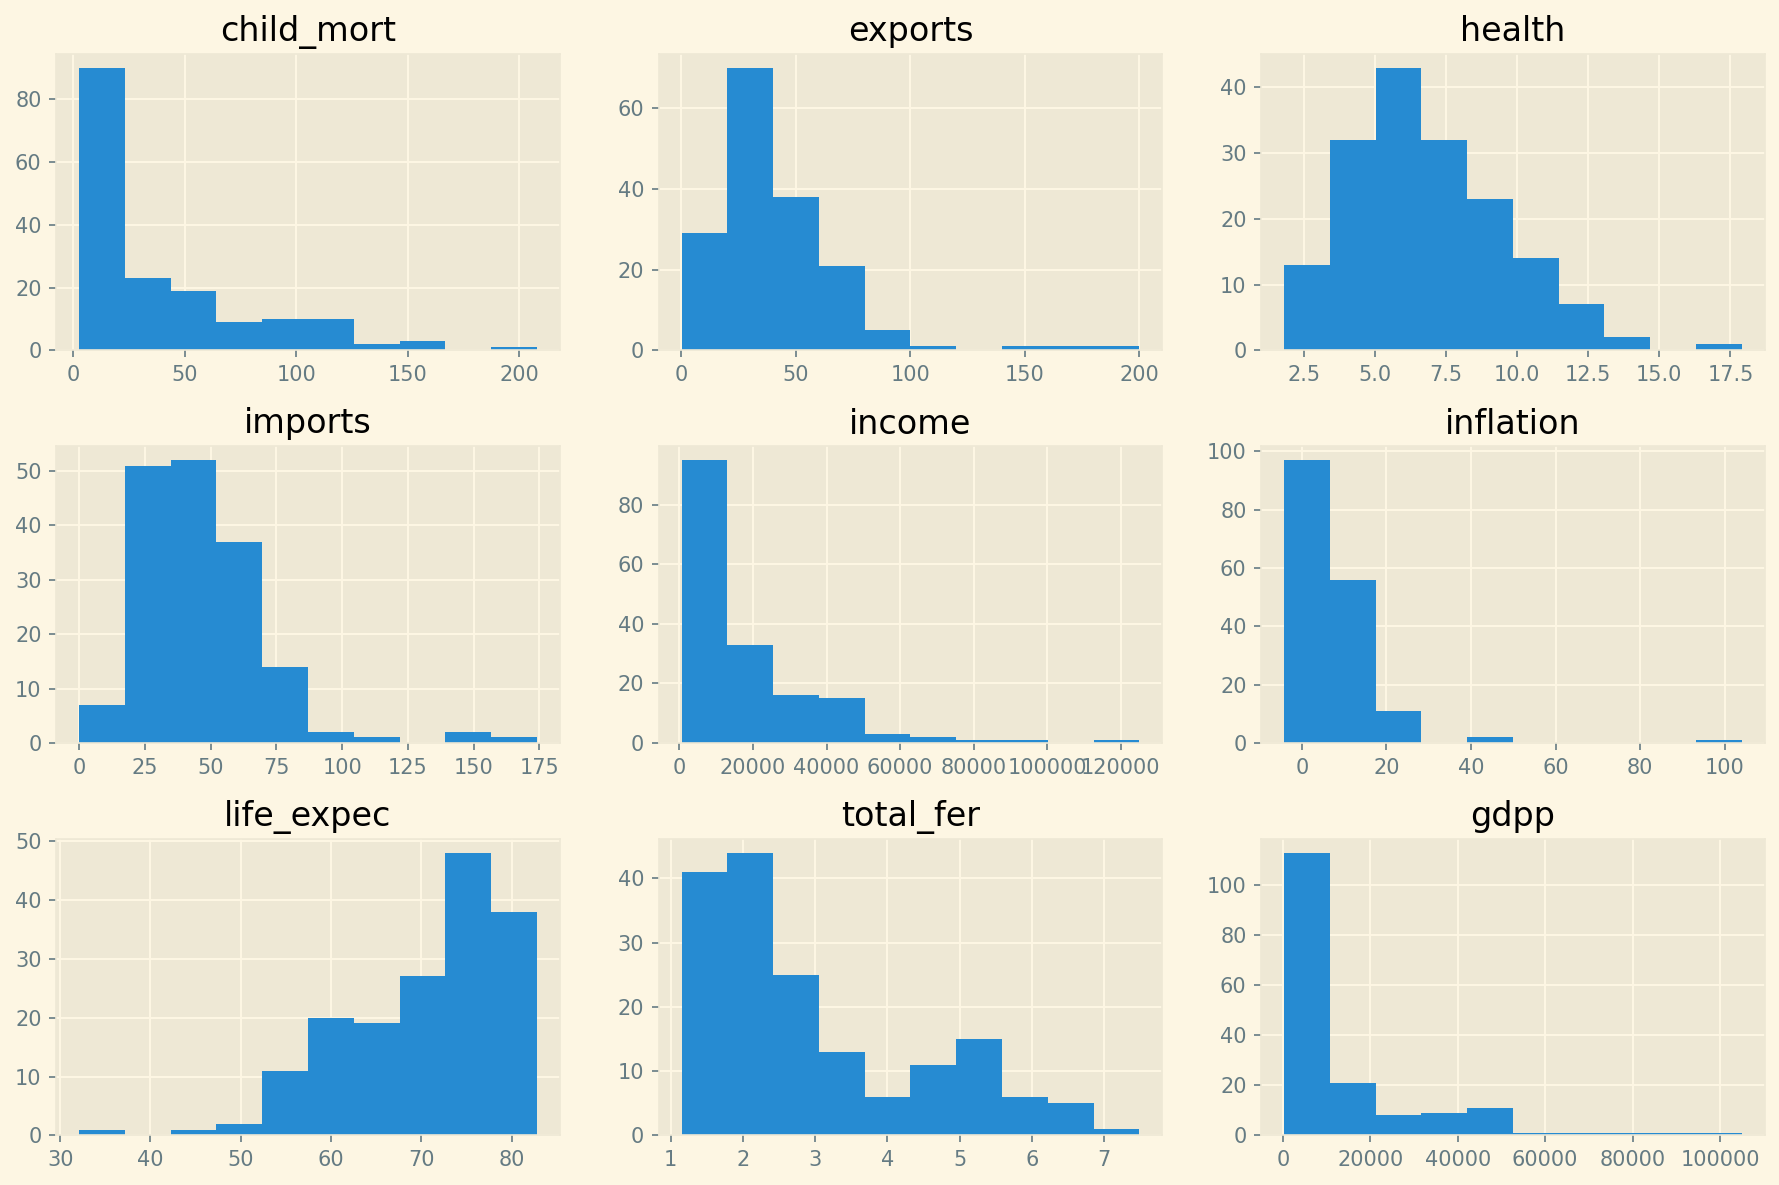

In [105]:
df_new.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

Transforming SKEWD Features

In [106]:
skew_limit=0.75 #define a limit above which we will log transform
skew_vals=df_new[df_new.columns].skew()
skew_vals

,0
child_mort,1.450774
exports,2.445824
health,0.705746
imports,1.905276
income,2.231480
inflation,5.154049
life_expec,-0.970996
total_fer,0.967092
gdpp,2.218051


In [107]:
skew_cols=(skew_vals
           .sort_values(ascending=False)
           .to_frame()
           .rename(columns={0:'Skew'})
           .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols


,Skew
inflation,5.154049
exports,2.445824
income,2.231480
gdpp,2.218051
imports,1.905276
child_mort,1.450774
total_fer,0.967092
life_expec,-0.970996


In [108]:
#perform the skew transformation:
for col in skew_cols.index.values:
  df_new[col]=np.log1p(df_new[col])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


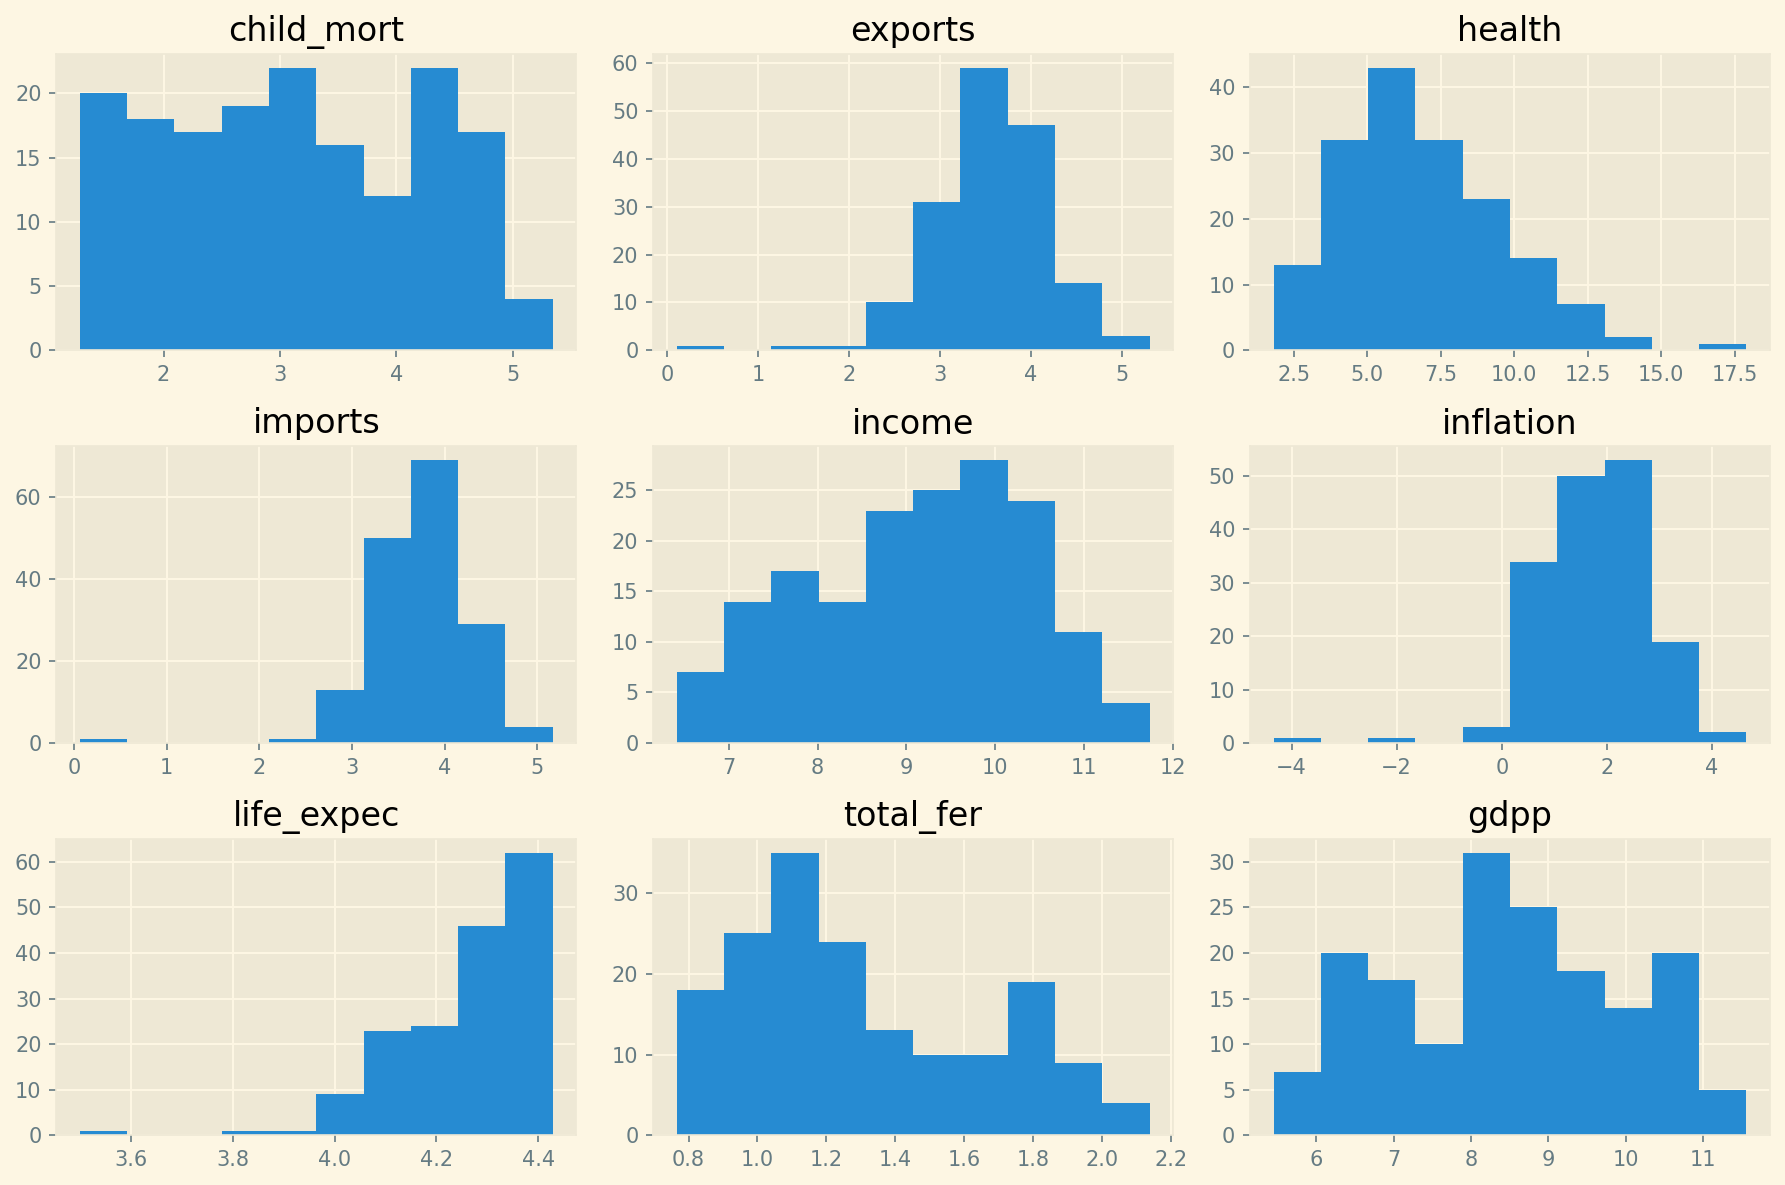

In [109]:
df_new.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

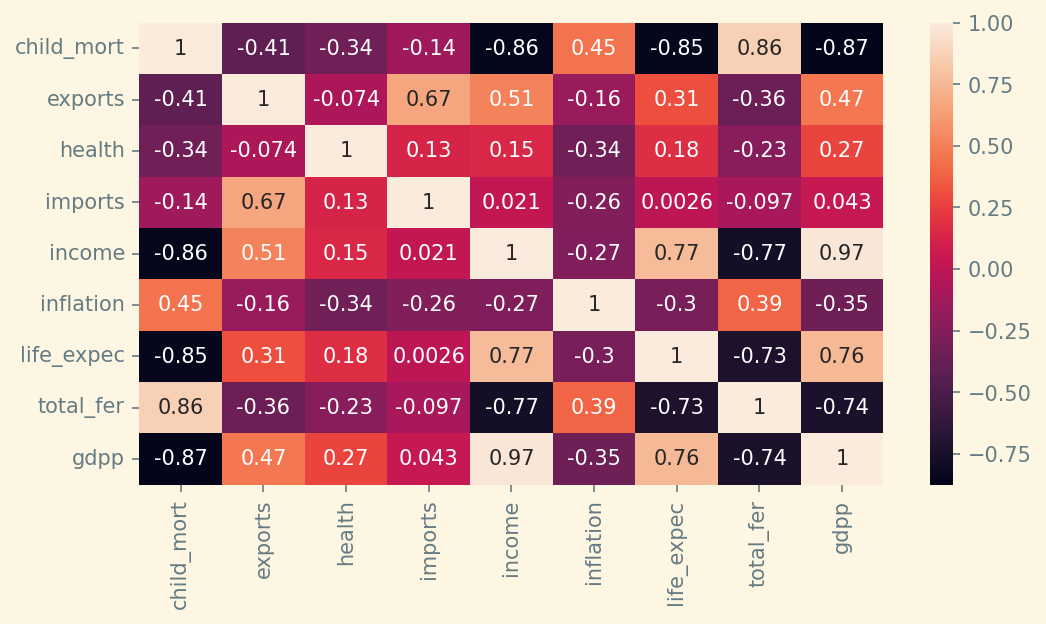

In [110]:
corr_mat=df_new.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

In [111]:
corr_mat.abs().idxmax()

,0
child_mort,child_mort
exports,exports
health,health
imports,imports
income,income
inflation,inflation
life_expec,life_expec
total_fer,total_fer
gdpp,gdpp


In [112]:
for x in range(len(df_new.columns)):
  corr_mat.iloc[x,x]=0.0


In [113]:
corr_mat.abs().idxmax()

,0
child_mort,gdpp
exports,imports
health,inflation
imports,exports
income,gdpp
inflation,child_mort
life_expec,child_mort
total_fer,child_mort
gdpp,income


In [114]:
mms=MinMaxScaler()
for col in df_new.columns:
  df_new[col]=mms.fit_transform(df_new[[col]]).squeeze()


In [115]:
df_new.describe().T
df_new.isnull().sum()
df_new[df_new['inflation'].isnull()]
df_new.dropna(inplace=True)

In [116]:
X=np.array(df_new)
pca=PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)
print(np.round(pca.explained_variance_ratio_*100,2))
print(pca.singular_values_)


[0.71504729 0.09290717 0.06125102 0.05840083 0.02903037 0.02497194
 0.01061277 0.00568089 0.0020977 ]
[71.5   9.29  6.13  5.84  2.9   2.5   1.06  0.57  0.21]
[6.2827406  2.26467743 1.83881658 1.79552423 1.26592525 1.1741076
 0.76541357 0.56000262 0.34029368]


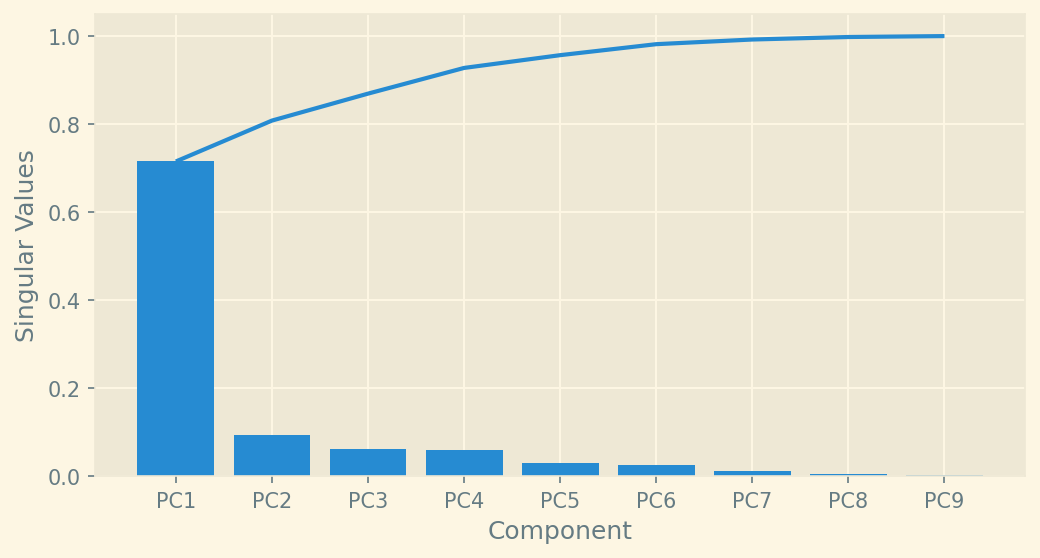

In [117]:
PC_list=['PC'+str(i+1) for i in range(9)]
plt.bar(PC_list,pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Component')
plt.ylabel('Singular Values')
plt.show()


In [118]:
print('explained var with first PC:',np.round(np.cumsum(pca.explained_variance_ratio_)[0],2))
print('explained var with first two PC:',np.round(np.cumsum(pca.explained_variance_ratio_)[1],2))
print('explained var with first three PC:',np.round(np.cumsum(pca.explained_variance_ratio_)[2],2))
print('explained var with first four PC:',np.round(np.cumsum(pca.explained_variance_ratio_)[3],2))
print('explained var with first five PC:',np.round(np.cumsum(pca.explained_variance_ratio_)[4],2))



explained var with first PC: 0.72
explained var with first two PC: 0.81
explained var with first three PC: 0.87
explained var with first four PC: 0.93
explained var with first five PC: 0.96


In [119]:
total_var=np.cumsum(pca.explained_variance_ratio_)
for i in range(9):
  print('PC{:2d},explained var:{:.2f}'.format(i+1,total_var[i]))

PC 1,explained var:0.72
PC 2,explained var:0.81
PC 3,explained var:0.87
PC 4,explained var:0.93
PC 5,explained var:0.96
PC 6,explained var:0.98
PC 7,explained var:0.99
PC 8,explained var:1.00
PC 9,explained var:1.00


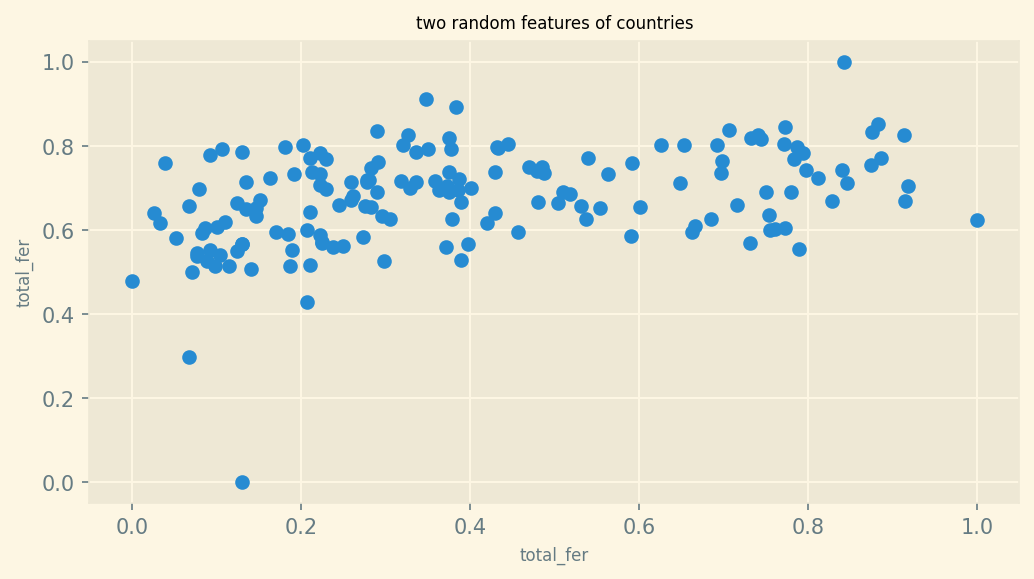

In [120]:
plt.scatter(X[:,7],X[:,5])
plt.title('two random features of countries',fontsize=8)
plt.xlabel('total_fer',fontsize=8)
plt.ylabel('total_fer',fontsize=8)
plt.show()